# Homework 1

Name: Kavana Manvi Krishnamuthy

ID: 2158984

## Part 1 - Histogram Equalization

For each image, do the following main steps:

a) Read and display the image.

b) If not grayscale, make it grayscale.

c) Calculate and display the histogram of this image.

d) Enhance the contrast of the intensity image using histogram equalization and display both the
uniform histogram and the newly enhanced intensity image.

e) In the report, explain why the two histograms (of the original image and of the enhanced image)
are different.

f) Calculate the difference between the original and enhanced image. Display it.

### Data

In [6]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.10.0


In [7]:
image1 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW3/Image1.jpeg")

In [8]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original Image')

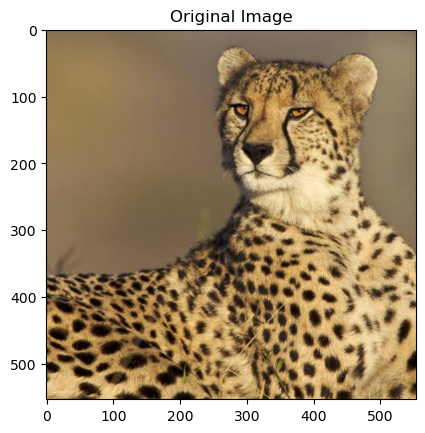

In [9]:
# Display the image
plt.imshow(image1_rgb)
plt.title('Original Image')

Data: Picture of a wild Cheetha- https://kids.nationalgeographic.com/animals/mammals/facts/cheetah

In [11]:
if len(image1_rgb.shape) == 3:
    image1_grey = cv2.cvtColor(image1_rgb, cv2.COLOR_BGR2GRAY)
else:
    image1_grey = image1

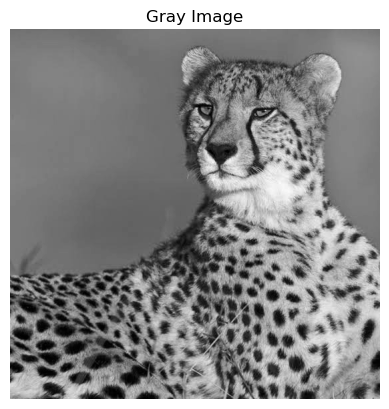

In [12]:
plt.imshow(image1_grey,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

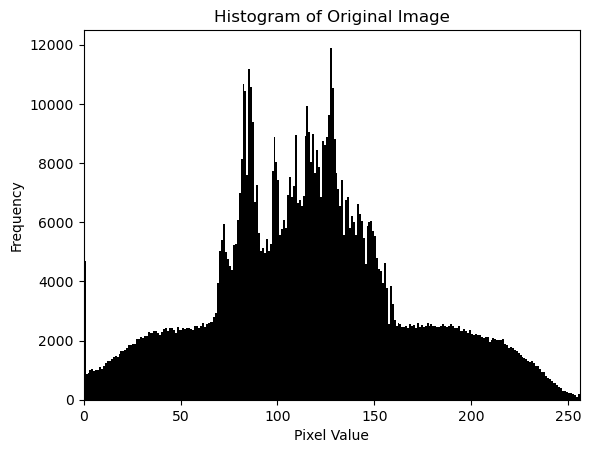

In [13]:
# Plot histogram
plt.figure()
plt.hist(image1.ravel(), bins=256, range=[0, 256], color='black')  # Fixed 'bins'
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.show()

In [14]:
# Enhance contrast using histogram equalization
image1_enhanced = cv2.equalizeHist(image1_grey)


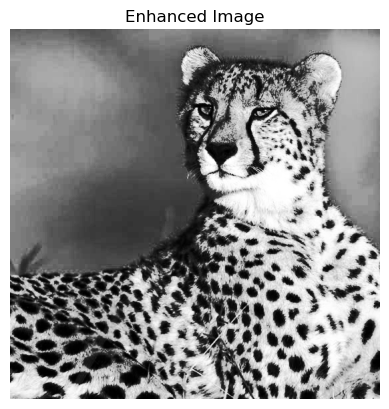

In [15]:
plt.imshow(image1_enhanced,cmap='gray')
plt.axis('off')
plt.title('Enhanced Image')
plt.show()

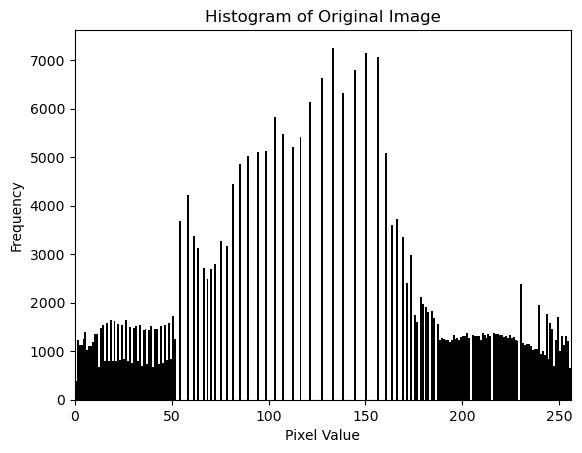

In [16]:
# Plot histogram
plt.figure()
plt.hist(image1_enhanced.ravel(), bins=256, range=[0, 256], color='black')  
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.show()

The histograms of the original and enhanced images look different because cv2.equalizeHist() tweaks pixel intensities to boost contrast. Basically, it spreads out the most common intensity values, stretching the range so details pop more. This makes a huge difference, especially if the original image has a limited intensity range. Instead of being bunched up in one area, the pixel values get redistributed for a more balanced look. Peaks in the histogram get flattened, valleys get filled in, and the whole thing ends up using the full 0-255 range, making the image clearer and more dynamic.

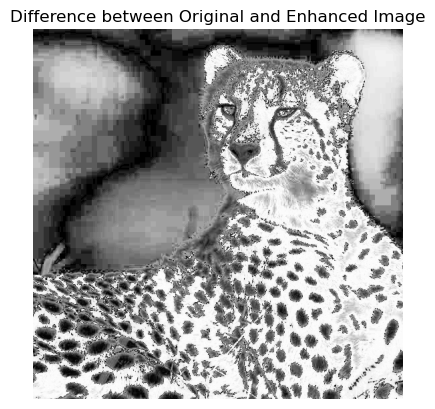

In [18]:
# Calculate and display difference between original and enhanced image
difference = cv2.absdiff(image1_grey, image1_enhanced)
plt.figure()
plt.title("Difference between Original and Enhanced Image")
plt.imshow(difference, cmap='gray')
plt.axis('off')
plt.show()

The histograms of the original and enhanced images are different because:
Histogram equalization redistributes pixel intensities to cover the full range of values (0-255) more uniformly.
This process stretches the contrast, making dark areas darker and bright areas brighter.
The original histogram may have peaks and valleys, while the equalized histogram will be more spread out.
Equalization can reveal details that were previously hidden due to poor contrast in the original image.
These differences result in improved overall contrast and potentially better visibility of image details in the enhanced version.


In [20]:
#localization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image1_enhanced_clahe1 = clahe.apply(image1_grey)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
image1_enhanced_clahe2 = clahe.apply(image1_grey)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(25,25))
image1_enhanced_clahe3 = clahe.apply(image1_grey)

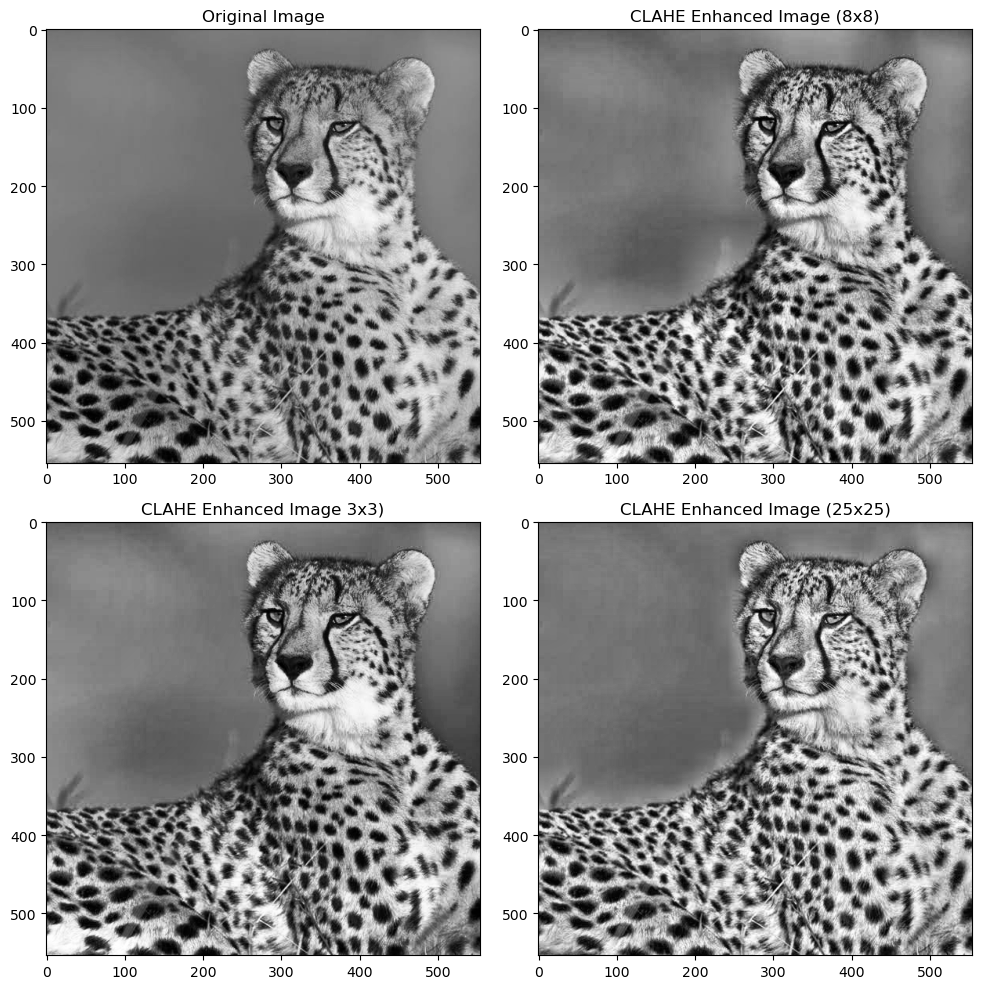

In [21]:
# Display images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image1_grey, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(image1_enhanced_clahe1, cmap='gray')
plt.title('CLAHE Enhanced Image (8x8)')

plt.subplot(2, 2, 3)
plt.imshow(image1_enhanced_clahe2, cmap='gray')
plt.title('CLAHE Enhanced Image 3x3)')

plt.subplot(2, 2, 4)
plt.imshow(image1_enhanced_clahe3, cmap='gray')
plt.title('CLAHE Enhanced Image (25x25)')

plt.tight_layout()
plt.show()

CLAHE is a game-changer for enhancing contrast in images, especially ones with complex patterns like a cheetah’s coat. Instead of adjusting the whole image at once, it breaks it into small tiles (like 3x3, 8x8, or 25x25) and tweaks the contrast in each section separately. This makes details pop in both bright and dark areas, giving the fur more texture and making the spots stand out. Plus, unlike basic adaptive histogram equalization, CLAHE keeps noise in check, so the lighter fur between spots doesn’t get overblown. A 3x3 tile size boosts contrast the most, making the spots look darker and more defined since it focuses on super small details. On the flip side, a 25x25 tile smooths things out by adjusting broader areas, while 8x8 gives a solid balance between detail and overall clarity. The smaller the tile, the more intense the contrast boost, which is why the 3x3 setting makes the cheetah’s spots pop the most.

## Part 2 - Image Filtering

In [24]:
image2 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW3/Image2.jpeg")
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original Image')

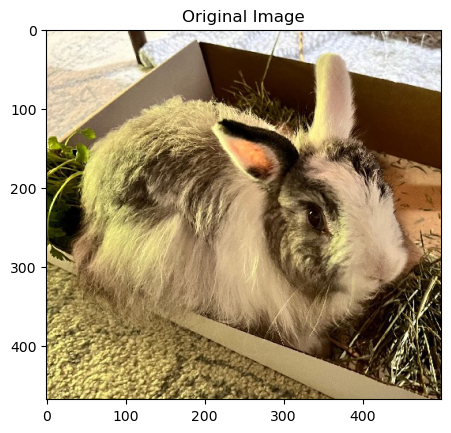

In [25]:
# Display the image
plt.imshow(image2_rgb)
plt.title('Original Image')

Data source- A picture of my cousin's pet bunny Marshmellow. Took this picture in New Jersey last year.

In [27]:
if len(image2_rgb.shape) == 3:
    image2_grey = cv2.cvtColor(image2_rgb, cv2.COLOR_BGR2GRAY)
else:
    image2_grey = image1

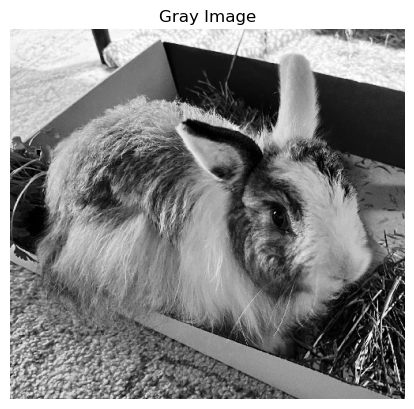

In [28]:
plt.imshow(image2_grey,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def custom_image_linear_filter(image, kernel):
    h, w = image.shape
    krnl_h, krnl_w = kernel.shape
    pad_h, pad_w = krnl_h // 2, krnl_w // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    # I have applied padding here
    filtered_image = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            rgn = padded_image[i:i + krnl_h, j:j + krnl_w]
            filtered_image[i, j] = np.sum(rgn * kernel)
    return np.clip(filtered_image, 0, 255).astype(np.uint8)

### 1. Prewitt

In [32]:
custom_kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  
custom_kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) 
custom_prewitt = custom_image_linear_filter(image2_grey, custom_kernel_prewitt_x) + custom_image_linear_filter(image2_grey, custom_kernel_prewitt_y)

The Prewitt operator is used for edge detection in image processing, similar to the Sobel operator, but with slightly different weights.

In [34]:
builtin_opencv_prewitt = cv2.filter2D(image2_grey, -1, custom_kernel_prewitt_x) + cv2.filter2D(image2_grey, -1, custom_kernel_prewitt_y)

In [35]:
# Compute difference images
diff_prewitt = cv2.absdiff(custom_prewitt, builtin_opencv_prewitt)

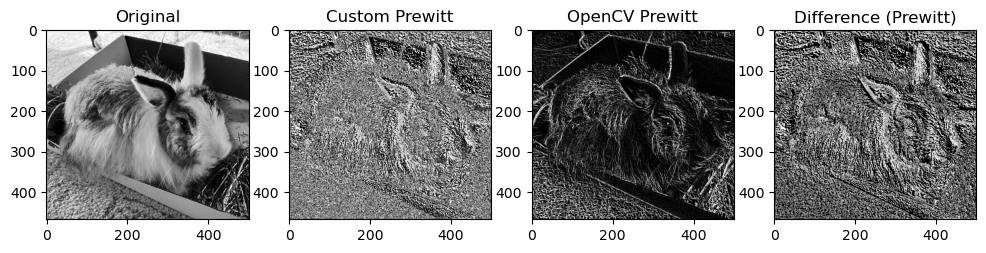

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image2_grey, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(custom_prewitt, cmap='gray')
plt.title('Custom Prewitt')

plt.subplot(1, 4, 3)
plt.imshow(builtin_opencv_prewitt, cmap='gray')
plt.title('OpenCV Prewitt')

plt.subplot(1, 4, 4)
plt.imshow(diff_prewitt, cmap='gray')
plt.title('Difference (Prewitt)')

plt.show()

### 2. Sobel

In [38]:
custom_kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  
custom_kernel_sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  

custom_sobel = custom_image_linear_filter(image2_grey, custom_kernel_sobel_x) + custom_image_linear_filter(image2_grey, custom_kernel_sobel_y)

These are the standard Sobel operator kernels. The Sobel operator is used to detect edges by approximating the image gradient in both horizontal (x) and vertical (y) directions.

In [40]:
# Apply Sobel filter in x and y directions
sobel_x = cv2.Sobel(image2_grey, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image2_grey, cv2.CV_64F, 0, 1, ksize=3)

# Combine x and y gradients
builtin_opencv_sobel = np.sqrt(sobel_x**2 + sobel_y**2)
builtin_opencv_sobel = cv2.normalize(builtin_opencv_sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

In [41]:
# Compute absolute difference
diff_sobel = cv2.absdiff(custom_sobel.astype(np.uint8), builtin_opencv_sobel.astype(np.uint8))

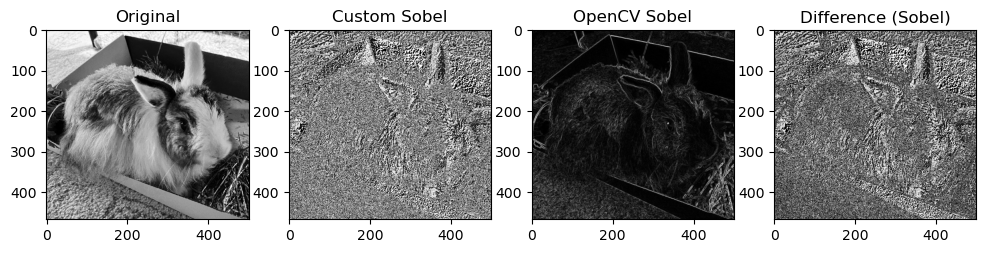

In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image2_grey, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(custom_sobel, cmap='gray')
plt.title('Custom Sobel')

plt.subplot(1, 4, 3)
plt.imshow(builtin_opencv_sobel, cmap='gray')
plt.title('OpenCV Sobel')

plt.subplot(1, 4, 4)
plt.imshow(diff_sobel, cmap='gray')
plt.title('Difference (Sobel)')

plt.show()

### 3. Point

In [44]:
custom_kernel_point = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
custom_point = custom_image_linear_filter(image2_grey, custom_kernel_point)

This kernel enhances edges by subtracting the surrounding pixels from the center pixel, which is weighted more heavily (5). It's a common kernel used for image sharpening and edge enhancement

In [46]:
builtin_opencv_point = cv2.filter2D(image2_grey, -1, custom_kernel_point)

In [47]:
diff_point = cv2.absdiff(custom_point, builtin_opencv_point)

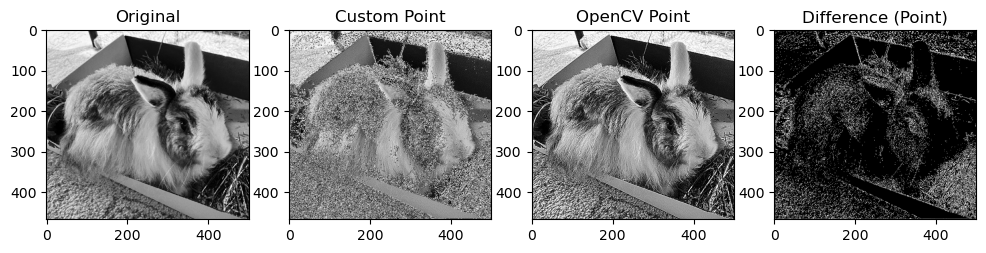

In [48]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image2_grey, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(custom_point, cmap='gray')
plt.title('Custom Point')

plt.subplot(1, 4, 3)
plt.imshow(builtin_opencv_point, cmap='gray')
plt.title('OpenCV Point')

plt.subplot(1, 4, 4)
plt.imshow(diff_point, cmap='gray')
plt.title('Difference (Point)')

plt.show()

### 4. Blurring

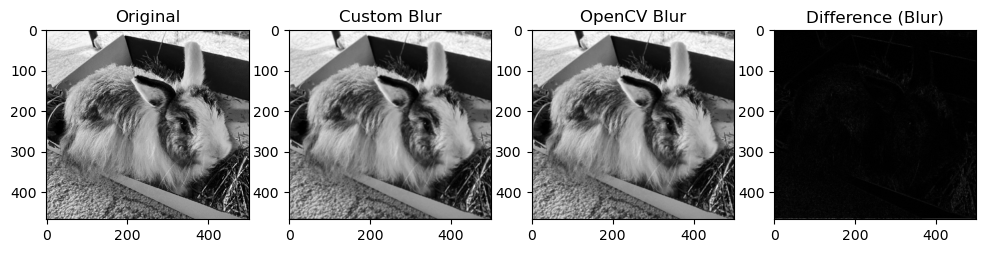

In [50]:
custom_kernel_blur = np.ones((3, 3)) / 9

### Blurring Filter ###
custom_blur = custom_image_linear_filter(image2_grey, custom_kernel_blur)
builtin_opencv_blur = cv2.GaussianBlur(image2_grey, (3, 3), 0)
diff_blur = cv2.absdiff(custom_blur, builtin_opencv_blur)

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image2_grey, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(custom_blur, cmap='gray')
plt.title('Custom Blur')

plt.subplot(1, 4, 3)
plt.imshow(builtin_opencv_blur, cmap='gray')
plt.title('OpenCV Blur')

plt.subplot(1, 4, 4)
plt.imshow(diff_blur, cmap='gray')
plt.title('Difference (Blur)')

plt.show()

This kernel, also known as a uniform or average filter, gives equal weight to all pixels in the 3x3 neighborhood. Each element in the kernel is 1/9, which ensures that the sum of all elements in the kernel is 1, maintaining the overall brightness of the image

## Part 3 - Bit Plane Splicing

In [53]:
image3 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW3/Image3.jpg")
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original Image')

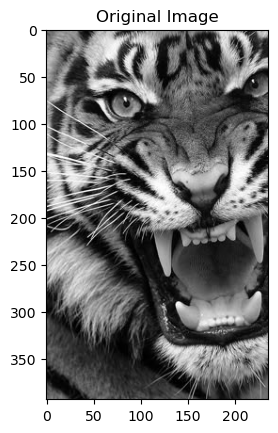

In [54]:
# Display the image
plt.imshow(image3_rgb)
plt.title('Original Image')

In [55]:
if len(image3_rgb.shape) == 3:
    image3_grey = cv2.cvtColor(image3_rgb, cv2.COLOR_BGR2GRAY)
else:
    image3_grey = image1

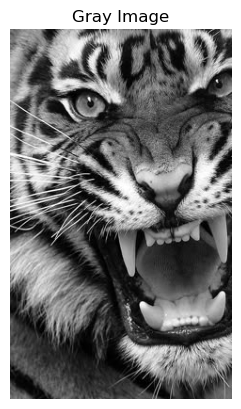

In [56]:
plt.imshow(image3_grey,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

In [57]:
def extract_bit_planes(image_data):
    planes = []
    for idx in range(8):
        plane = (image_data >> idx) & 1  # Scale by 255 for contrast
        planes.append(plane * 255)
    return planes

In [58]:
# Perform bit-plane slicing
bit_planes = extract_bit_planes(image3_grey)

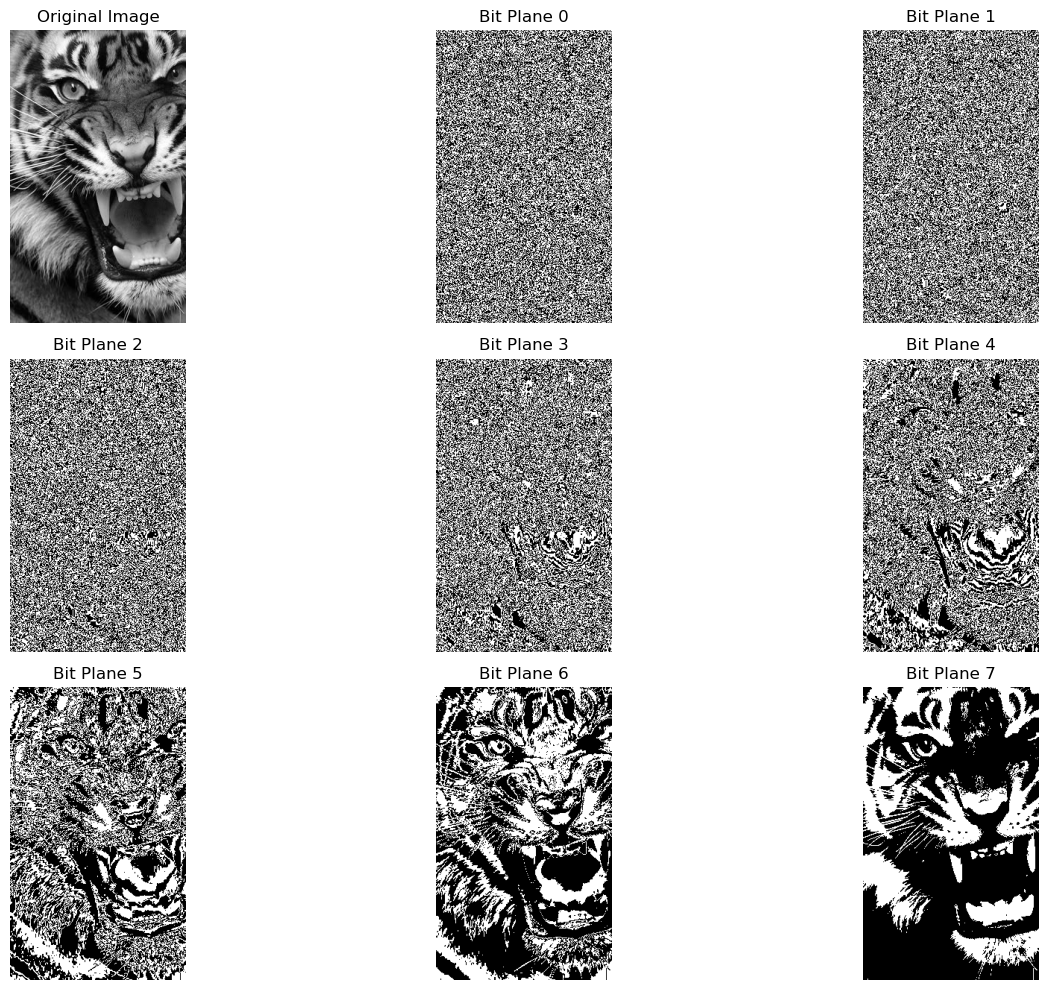

In [59]:
# Display original image and 8 bit planes
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
plt.imshow(image3_grey, cmap='gray')
plt.title('Original Image')
plt.axis('off')
for i in range(8):
    plt.subplot(3, 3, i+2)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [60]:
def combine_bit_planes(planes):
    combined_images = []
    combined_image = planes[7]//255 * (1 << 7) 
    
    for idx in range(6, -1, -1): 
        combined_image += planes[idx] // 255 * (1 << idx)  
        combined_images.append(combined_image) 

    return combined_images

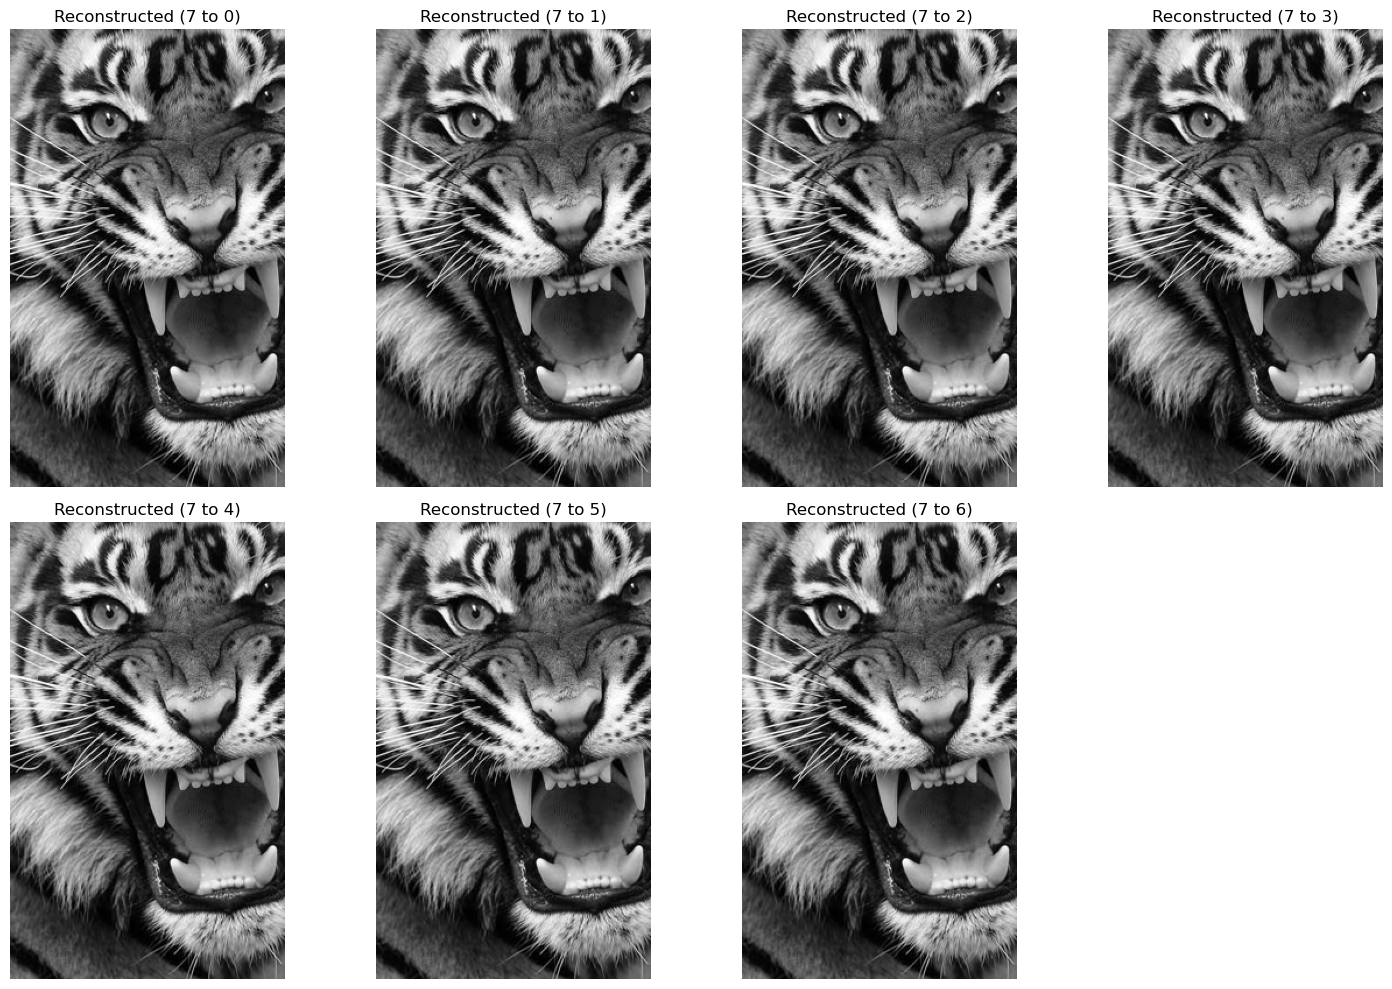

In [61]:
# Reconstruct the image progressively
reconstructed_images = combine_bit_planes(bit_planes)

# Display reconstructed images
plt.figure(figsize=(15, 10))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'Reconstructed (7 to {i})')
    plt.axis('off')

plt.tight_layout()
plt.show()

MSB carries the most amount of visual info. The image starts to become clear from 5th bit plane. 4th one has few edges.
You can still get good info from 5th bit plane.